я помогала делать работу Лике Джиоевой и Маше Козловой

In [1]:
import re
import gensim
import logging
import nltk.data
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from pymorphy2 import MorphAnalyzer
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from gensim.models import word2vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
import random

import warnings
warnings.filterwarnings('ignore')

## 1. преобразование текста 

In [2]:
with open('yoga-sna.txt_Ascii.txt', encoding='utf-8') as f:
    text = f.read()

#### разбиваем на предложения

In [3]:
text = re.sub(r'\n', ' ', text)
text = sent_tokenize(text)

In [4]:
morph = MorphAnalyzer()

#### создаем список с леммами

In [5]:
words = []
for sent in text:
    sentences = word_tokenize(sent)
    token = [word.lower() for word in sentences]
    tokens = [word for word in token if word.isalpha()] 
    words.append(tokens)

#### достаем леммы и формируем из них текст

In [6]:
lemmd_sent = []
lemmd_text = []
poses = [] #это нужно для 5 задания
for group in words:
    lemmd_sent = []
    for unit in group:
        ana = morph.parse(unit)
        lemma = ana[0].normal_form
        lemmd_sent.append(lemma)
        pos = ana[0]
        if (pos.tag.POS=='PREP') or (pos.tag.POS=='PRCL') or (pos.tag.POS=='CONJ'):
            poses.append(pos.normal_form)
    lemmd_sents = ' '.join(lemmd_sent)
    lemmd_text.append(lemmd_sents)
new_text = '\n'.join(lemmd_text)
with open ('novaya-yoga-sna.txt_Ascii.txt', 'w', encoding='utf-8') as f:
    f.write(new_text)

In [7]:
f = 'novaya-yoga-sna.txt_Ascii.txt'
data = gensim.models.word2vec.LineSentence(f)

## 2. обучаем модель по заданным параметрам

* #### размер вектора 300
* #### минимальное количество вхождений 5
* #### окно 5
* #### количество итераций 50

In [8]:
model_yoga = gensim.models.Word2Vec(data, size=300, window=5, min_count=5, iter=50)

In [9]:
model_yoga.init_sims(replace=True)
model_path = 'yoga.bin'

print("Saving model...")
model_yoga.wv.save_word2vec_format(model_path, binary=True)

Saving model...


#### количество слов в модели

In [10]:
print('слов в модели - ', len(model_yoga.wv.vocab))

слов в модели -  761


## 3. использование функций

In [11]:
words = sorted([w for w in model_yoga.wv.vocab])
print(words)

['viii', 'а', 'автор', 'аспект', 'бардо', 'без', 'белый', 'бесконечный', 'благо', 'благодаря', 'бодрствование', 'божество', 'бок', 'более', 'большой', 'бон', 'бонпо', 'брать', 'будда', 'буддизм', 'буддийский', 'будто', 'будущее', 'будущий', 'буква', 'буквально', 'бусинка', 'бхакшас', 'бы', 'бывать', 'быстро', 'быть', 'в', 'важный', 'ваш', 'введение', 'вверх', 'ввести', 'великий', 'великое', 'вернуться', 'вести', 'весь', 'ветер', 'вещий', 'взглянуть', 'взять', 'вид', 'видение', 'видеть', 'визуализация', 'визуализировать', 'включать', 'включая', 'вместе', 'внезапно', 'вновь', 'внутри', 'вода', 'воздух', 'возможно', 'возможность', 'возникать', 'возникновение', 'возникнуть', 'войти', 'вокруг', 'восемь', 'восприятие', 'восточный', 'вот', 'впечатление', 'впоследствии', 'время', 'врождённый', 'всегда', 'всего', 'вследствие', 'вспомнить', 'всякий', 'вторичный', 'входить', 'вы', 'выйти', 'выполнение', 'выполнить', 'выполнять', 'гараб', 'гаруда', 'где', 'глава', 'главное', 'главный', 'глаз', 'гл

### найти ближайшие 5 слов для:

#### животного

In [12]:
model_yoga.wv.most_similar("стервятник", topn=5)

[('кусок', 0.972676157951355),
 ('птица', 0.9627500176429749),
 ('скал', 0.9576112031936646),
 ('гора', 0.9560835957527161),
 ('уехать', 0.954208254814148)]

#### абстрактного понятия

In [13]:
model_yoga.wv.most_similar("ясность", topn=5)

[('сновидение', 0.9450933933258057),
 ('появляться', 0.9424070715904236),
 ('привязанность', 0.9406808018684387),
 ('вследствие', 0.9296247363090515),
 ('развивать', 0.9268180727958679)]

#### имени главного героя (в моей книге главный герой - человек)

In [14]:
model_yoga.wv.most_similar("человек", topn=5)

[('ребёнок', 0.879213809967041),
 ('странный', 0.8722853064537048),
 ('принимать', 0.8520383834838867),
 ('быть', 0.8508052825927734),
 ('длинный', 0.8459328413009644)]

#### прилагательного "хороший"

In [15]:
model_yoga.wv.most_similar("хороший", topn=5)

[('помнить', 0.9786468744277954),
 ('теперь', 0.9747029542922974),
 ('узнать', 0.9657723903656006),
 ('идти', 0.9646636247634888),
 ('ясно', 0.9642211198806763)]

#### прилагательного "плохой"

In [16]:
model_yoga.wv.most_similar("плохой", topn=5)

[('глубоко', 0.9605590105056763),
 ('отрицательный', 0.9588527679443359),
 ('трудность', 0.9505876302719116),
 ('ни', 0.9488650560379028),
 ('ситуация', 0.9477555155754089)]

### найти семантическую пропорцию

In [17]:
print(model_yoga.most_similar(positive=['начало', 'объект'], negative=['привязанность'])[0][0])

последний


### найти лишнее в списке слов

In [18]:
model_yoga.wv.doesnt_match("помощь развитие ребёнок путь учение".split())

'ребёнок'

## 4. попробую сделать визуализацию

In [19]:
words = ['ветер', 'вода', 'воздух', 'гора', 'дерево', 'звук', 'земля', 
         'кристалл', 'облако', 'прана', 'природа', 'цветок']  
X = model_yoga[words]

In [20]:
pca = PCA(n_components=2)
coords = pca.fit_transform(X)

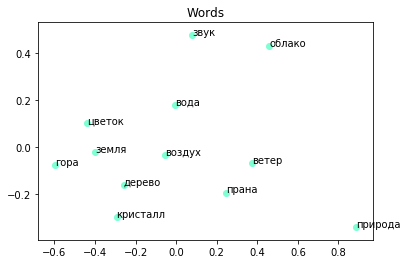

In [21]:
plt.scatter(coords[:, 0], coords[:, 1], color='Aquamarine')
plt.title('Words')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

#### в принципе, на правду чем-то похоже

## 5. взять предложение и замените все слова (которые не являются служебными) на ближайшие по векторам

In [29]:
i = random.randint(1,len(text))

new_sent = []
trial_sent = lemmd_text[i]
trial_sent = trial_sent.split()
show_trial = ' '.join(trial_sent)
print('возьмем предложение: ', show_trial)

for word in trial_sent:
    if (word in poses) or (word not in model_yoga.wv.vocab):
        new_sent.append(word)
    else:
        new_sent.append(model_yoga.wv.most_similar(word, topn=1)[0][0])

sent = ' '.join(new_sent)
print('получим переделанное: ', sent)


возьмем предложение:  я подумать что прежде никогда не слышать о такой релаксировать состояние самайя
получим переделанное:  голос ответить что помнить узнать не понимать о иногда релаксировать сознание прямо
